#Import modules used in this portfolio project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data and review top 5 rows including headers.  Is there anything that needs to be changed about the headings or formatting of the data

In [2]:
df = pd.read_csv("all_data.csv")
print(df.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


#Review and analyze the summary statistics of the dataframe

In [3]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


#Analysi: What countries/years are considered in these data?

In [46]:
print(pd.unique(df.Country))
print(" ")
print(pd.unique(df.Year))

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
 
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#General review of the Life Expectency using several different plot to analyze the data for each country

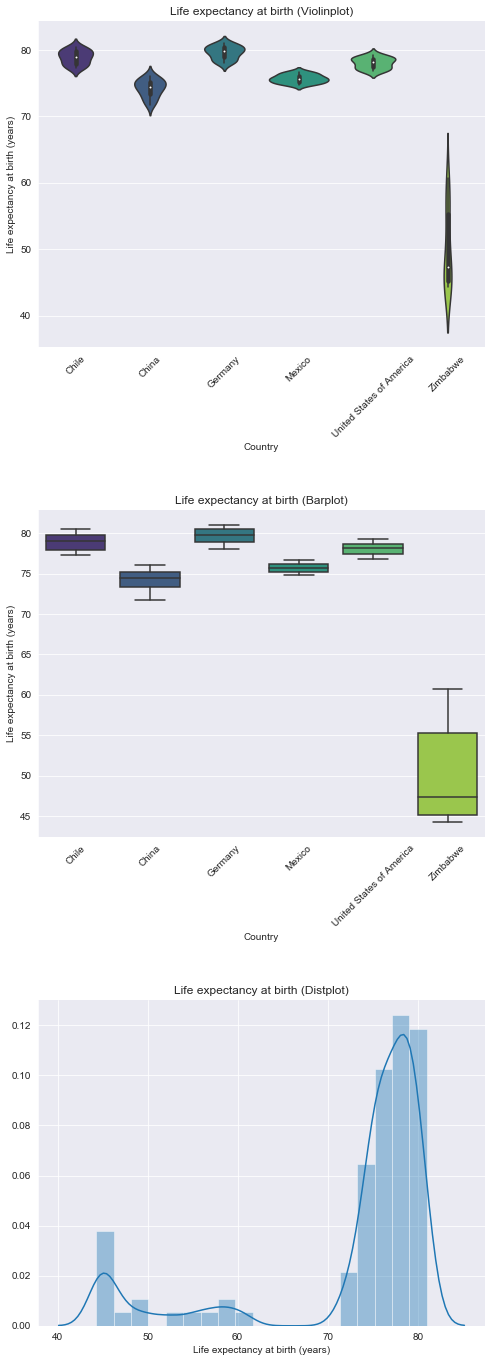

In [5]:
# figsize
fig = plt.figure(figsize=(8,24))

# stablish the style and palette of the plots
sns.set_style("darkgrid")
sns.color_palette("viridis")

# Subplot #1
plt.subplot(3,1,1)
plt.title('Life expectancy at birth (Violinplot)')
plt.xticks(rotation=45)
sns.violinplot(data=df, x="Country", y="Life expectancy at birth (years)", palette="viridis")

# subplot #2
plt.subplot(3,1,2)
plt.title('Life expectancy at birth (Barplot)')
plt.xticks(rotation=45)
sns.boxplot(data=df, x="Country", y="Life expectancy at birth (years)", palette="viridis")

# subplot #3
plt.subplot(3,1,3)
plt.title('Life expectancy at birth (Distplot)')
sns.distplot(df["Life expectancy at birth (years)"])

# Aesthetics
plt.subplots_adjust(hspace=0.5)

sns.despine()
plt.show()

#Has life expectancy increased over time in the six nations?

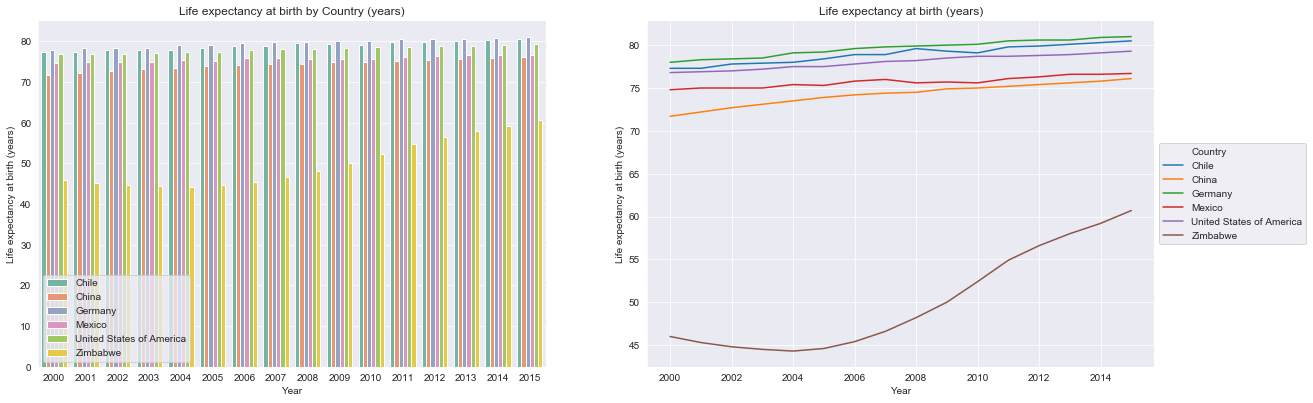

In [7]:
# figsize
fig = plt.figure(figsize=(20,14))

# stablish the style and palette
sns.set_style("darkgrid")
sns.color_palette("viridis")

# Subplot #1
plt.subplot(2,2,1)
plt.title('Life expectancy at birth by Country (years)')
sns.barplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country", palette="Set2")
plt.legend(loc='lower left')

# subplot #2
plt.subplot(2,2,2)
plt.title('Life expectancy at birth (years)')
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Aesthetics
sns.despine()
plt.show()

#What if we analyze in more details these graphs but for every nation?

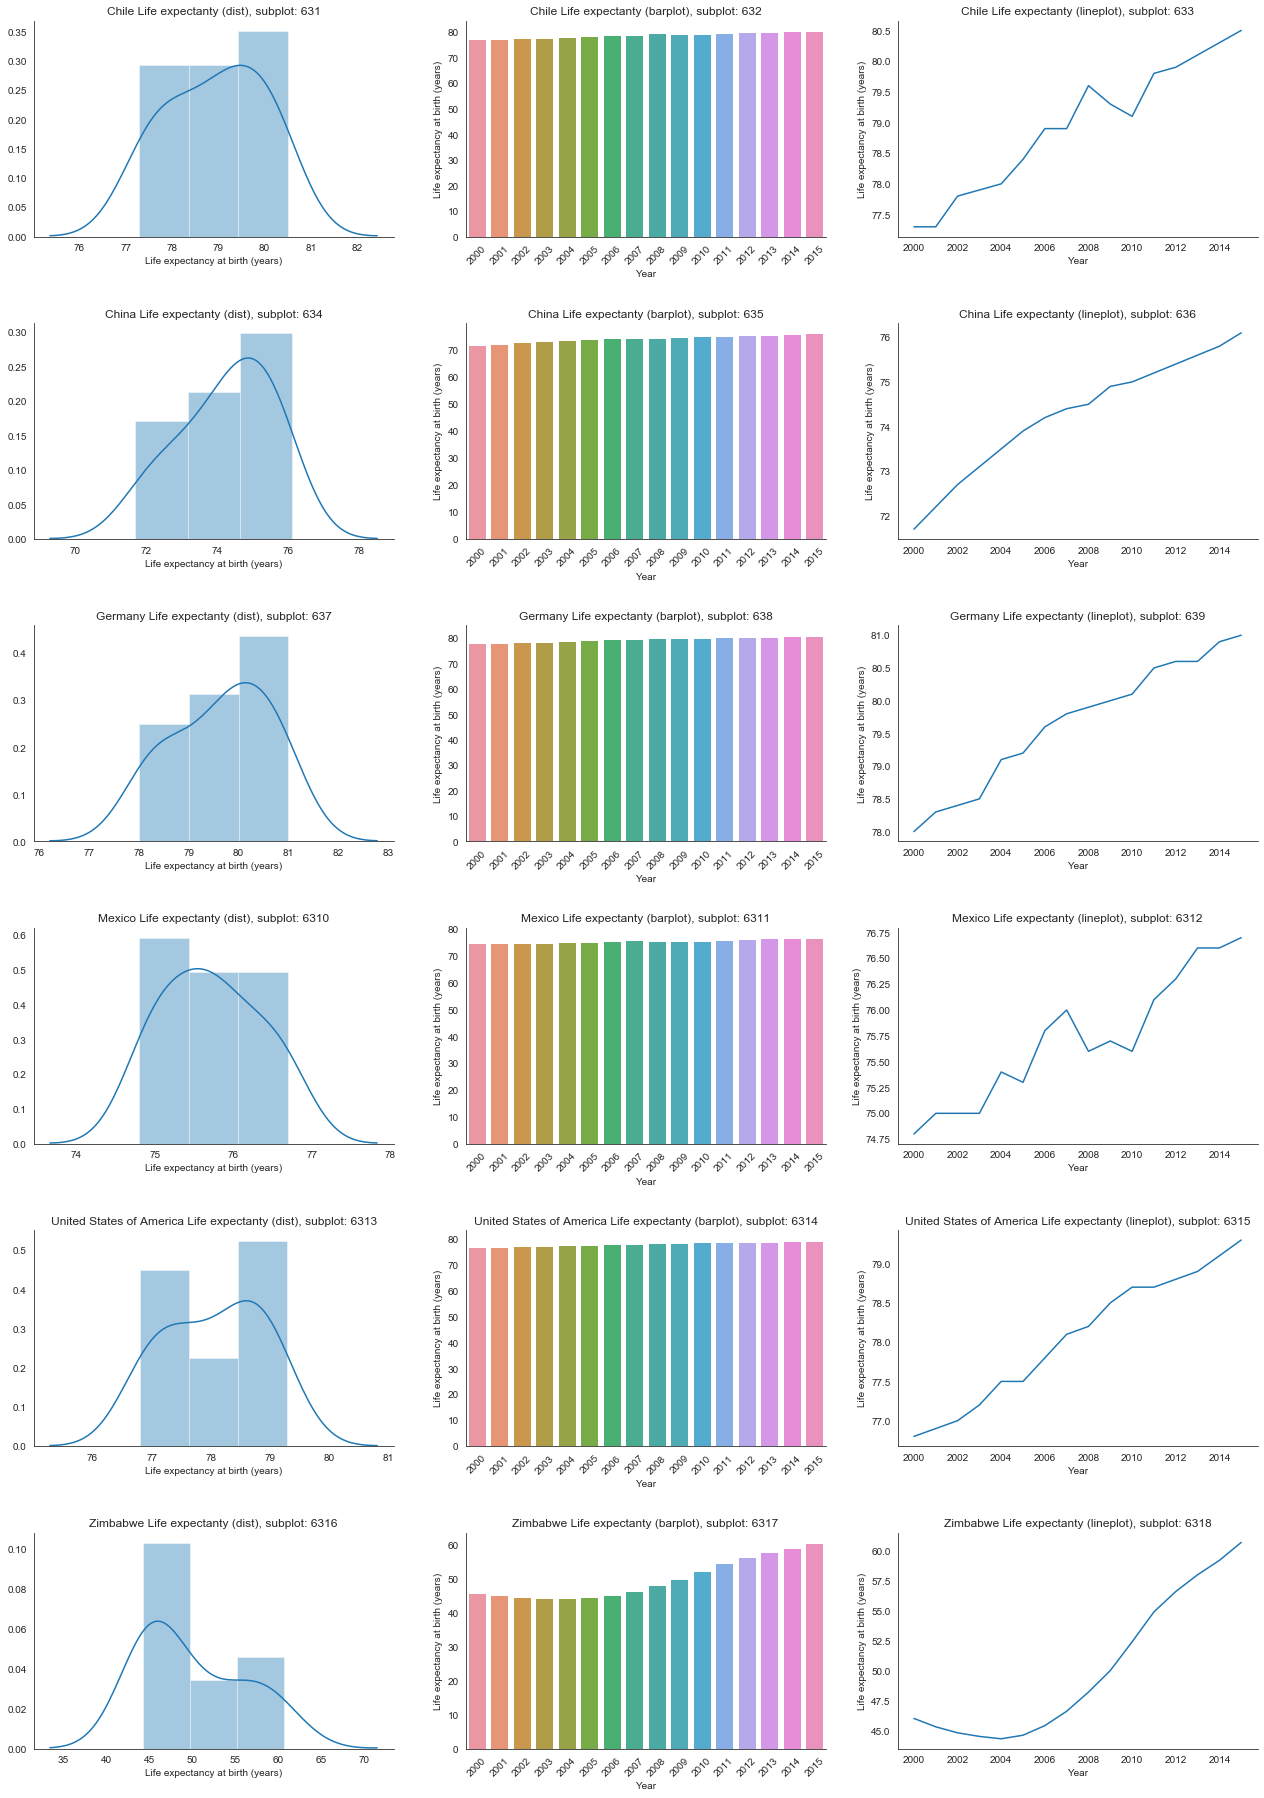

In [9]:
#  Make a list of the nations
country_list = df.Country.unique()

#  plot Numerical Data
a = len(country_list)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,30))
sns.set_style("white")

for i in country_list:
    plt.subplot(a, b, c)
    plt.title('{} Life expectanty (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel("Life expectancy")  
    sns.distplot(df["Life expectancy at birth (years)"][df.Country == i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} Life expectanty (barplot), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=45)
    sns.barplot(data=df[df.Country == i], x="Year", y="Life expectancy at birth (years)")
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} Life expectanty (lineplot), subplot: {}{}{}'.format(i, a, b, c))
    sns.lineplot(data=df[df.Country == i], x="Year", y="Life expectancy at birth (years)")
    c = c + 1
    
    plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.4)

sns.despine()
plt.show()

#Has GDP increased over time in the six nations?

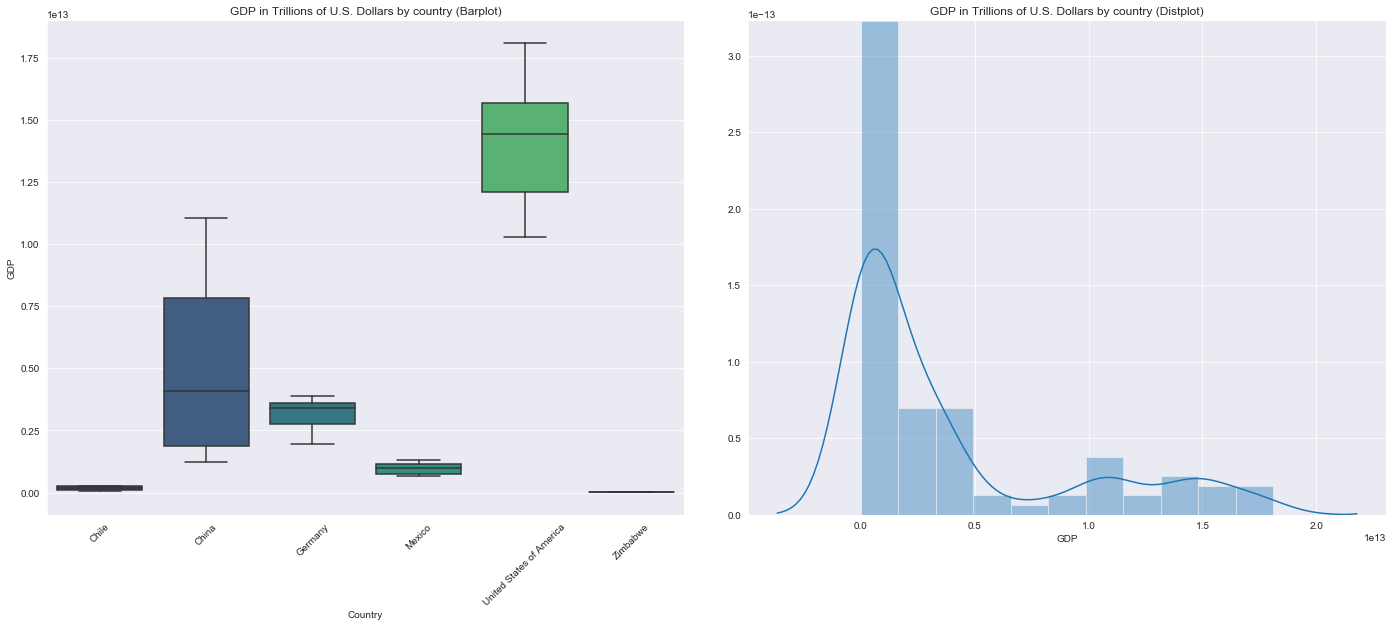

In [13]:
# figsize
fig = plt.figure(figsize=(24,20))

# stablish the style and palette
sns.set_style("darkgrid")
sns.color_palette("viridis")

# subplot #1
plt.subplot(2,2,1)
plt.title('GDP in Trillions of U.S. Dollars by country (Barplot)')
plt.xticks(rotation=45)
sns.boxplot(data=df, x=df["Country"], y=df["GDP"], palette="viridis")

# subplot #2
plt.subplot(2,2,2)
plt.title('GDP in Trillions of U.S. Dollars by country (Distplot)')
sns.distplot(df["GDP"])
    
# Aesthetics
plt.subplots_adjust(wspace=0.1)

sns.despine()
plt.show()

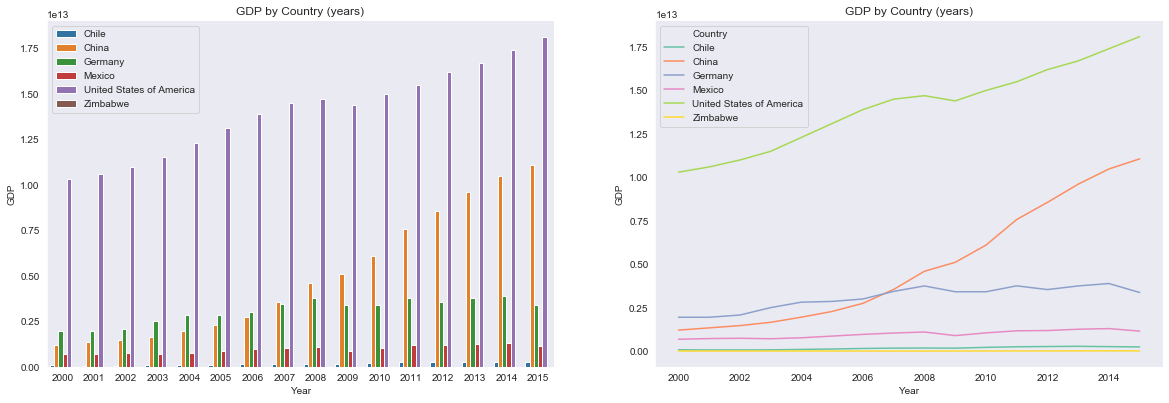

In [15]:

# figsize
fig = plt.figure(figsize=(20,14))

# stablish the style and palette
sns.set_style("dark")
sns.color_palette("viridis")

# Subplot #1
plt.subplot(2,2,1)
plt.title('GDP by Country (years)')
sns.barplot(data=df, x=df.Year, y=df.GDP, hue="Country")
plt.legend(loc='upper left')

# subplot #2
plt.subplot(2,2,2)
plt.title('GDP by Country (years)')
sns.lineplot(data=df, x=df.Year, y=df.GDP, hue="Country", palette="Set2")
plt.legend(loc='upper left')

# Aesthetics
plt.subplots_adjust(wspace=0.2)
sns.despine()
plt.show()

#Is there a correlation between GDP and life expectancy of a country?

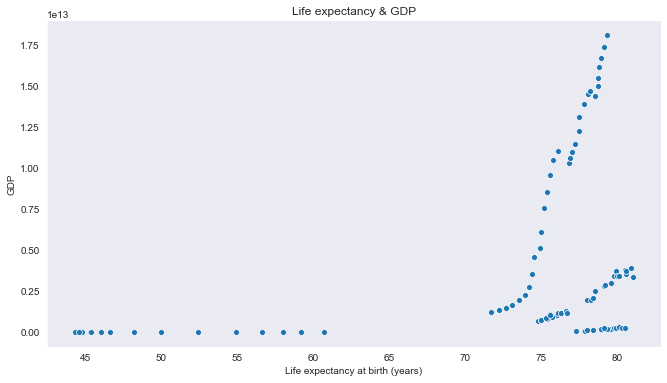

In [16]:
# To answer this question we can do a scatter plot

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
sns.set_style("white")

# Visualizar la data y separarla por cada nación
sns.scatterplot(data=df, x="Life expectancy at birth (years)", y="GDP")
sns.despine()

# Colocar títulos y etiquetas
plt.title("Life expectancy & GDP")
plt.show()

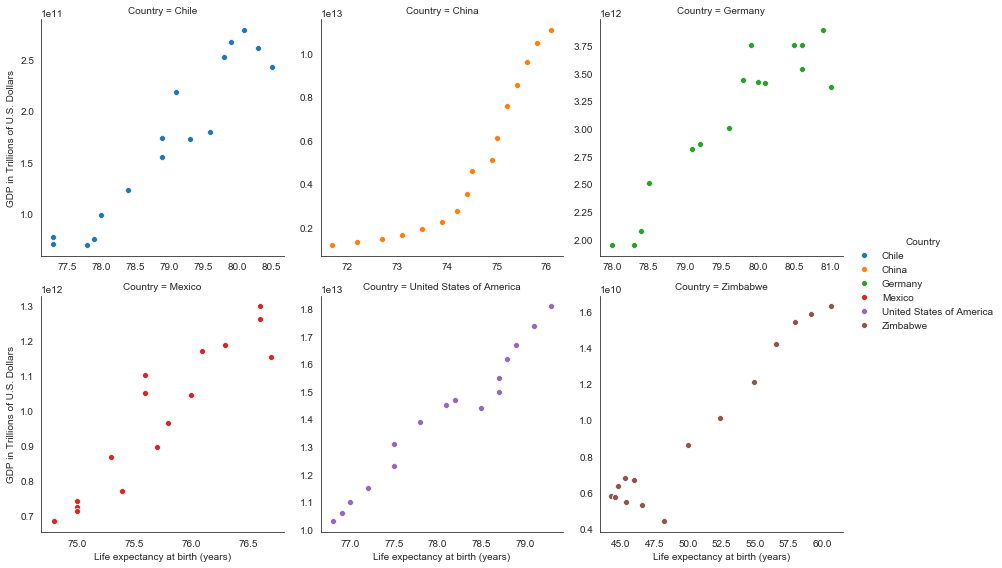

In [17]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, height=4,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life expectancy at birth (years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

#What is the average life expectancy in these nations?

In [20]:
print(df.groupby('Country')['Life expectancy at birth (years)'].mean()) 

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


In [42]:
multi_group_var = df.groupby(['Year', 'Country'])[['Life expectancy at birth (years)']].mean()
print(multi_group_var)      

                               Life expectancy at birth (years)
Year Country                                                   
2000 Chile                                                 77.3
     China                                                 71.7
     Germany                                               78.0
     Mexico                                                74.8
     United States of America                              76.8
...                                                         ...
2015 China                                                 76.1
     Germany                                               81.0
     Mexico                                                76.7
     United States of America                              79.3
     Zimbabwe                                              60.7

[96 rows x 1 columns]


Year
2000    70.766667
2001    70.833333
2002    70.950000
2003    71.033333
2004    71.300000
2005    71.483333
2006    71.950000
2007    72.300000
2008    72.666667
2009    73.066667
2010    73.483333
2011    74.200000
2012    74.600000
2013    74.966667
2014    75.316667
2015    75.716667
Name: Life expectancy at birth (years), dtype: float64


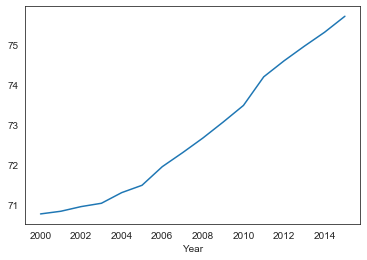

In [45]:
global_yearly_life_expectancy = df.groupby('Year')['Life expectancy at birth (years)'].mean() 
print(global_yearly_life_expectancy) 
global_yearly_life_expectancy.plot()
plt.show()